### Kaggles's House Price Prediction Problem

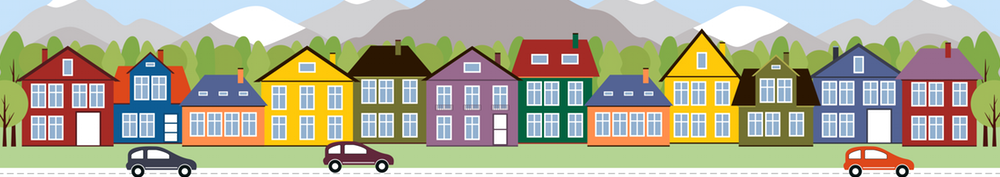

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

###### Libraries Import

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

###### Data Import

In [2]:
#import the dataset
train = pd.read_csv('Data/Train.csv').drop('Id',axis = 1)
test = pd.read_csv('Data/Test.csv').drop('Id',axis = 1)

In [3]:
MSSubClass_features = {
20:"1-STORY 1946 & NEWER ALL STYLES",
30:"1-STORY 1945 & OLDER",
40:"1-STORY W/FINISHED ATTIC ALL AGES",
45:"1-1/2 STORY - UNFINISHED ALL AGES",
50:"1-1/2 STORY FINISHED ALL AGES",
60:"2-STORY 1946 & NEWER",
70:"2-STORY 1945 & OLDER",
75:"2-1/2 STORY ALL AGES",
80:"SPLIT OR MULTI-LEVEL",
85:"SPLIT FOYER",
90:"DUPLEX - ALL STYLES AND AGES",
120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
150:"1-1/2 STORY PUD - ALL AGES",
160:"2-STORY PUD - 1946 & NEWER",
180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"}

In [4]:
train['MSSubClass'].replace(MSSubClass_features,inplace = True)
test['MSSubClass'].replace(MSSubClass_features,inplace = True)

In [5]:
#Check the dimensions of the train and test set

train.shape,test.shape

((1460, 80), (1459, 79))

##### Exploratory Data Analysis

1. Univariate Analysis
2. Bivariate Analysis

In [6]:
train.head()
#We should get back all the categories that have been converted in this dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### Plotting functions for univariate and bivariate analysis

In [7]:
# Distplot
def dist_plot(col,train = train,test = test,log_transform = False):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,4))
    
    if log_transform == True:
        sns.distplot(np.log(train[col]),ax = ax[0])
        ax[0].set_title('TrainSet')
        sns.distplot(np.log(test[col]),ax = ax[1])   
        ax[1].set_title('TestSet')
        plt.suptitle(col)
        plt.tight_layout()
        plt.show()
        
    else:
        sns.distplot(train[col],ax = ax[0])
        ax[0].set_title('TrainSet')
        sns.distplot(test[col],ax = ax[1])   
        ax[1].set_title('TestSet')
        plt.suptitle(col)
        plt.tight_layout()
        plt.show()

In [8]:
# Barh plot
def barh_plot(col,train = train,test = test):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    dat_train = train[col].value_counts().sort_values(ascending = True)
    xtrain = list(dat_train.index)
    ytrain = list(dat_train.values)
    
    dat_test = test[col].value_counts().sort_values(ascending = True)
    xtest = list(dat_test.index)
    ytest = list(dat_test.values)
    
    
    fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,4))
    ax[0].barh(xtrain,ytrain)
    ax[0].set_title('Train Set')
    ax[1].barh(xtest,ytest)
    ax[1].set_title('Test Set')
    plt.suptitle(col)

In [9]:
# Boxplot
def box_plot(col,train = train):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    plt.figure(figsize = (15,6))
    plt.title(col)
    plt.xticks(rotation = 90)
    sns.boxplot(col,'SalePrice',data = train)
    plt.show()

In [10]:
def scatter_plot(col,train = train, color = 'b'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    plt.figure(figsize = (15,6))
    sns.scatterplot(col,'SalePrice',data = train,color = color)
    plt.show()

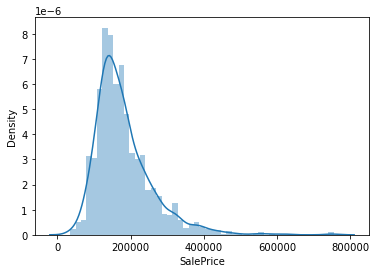

In [11]:
#Target variable 
sns.distplot(train['SalePrice'])
plt.show()

#Inf: SalePrice is a quantity that is bound to be skewed.

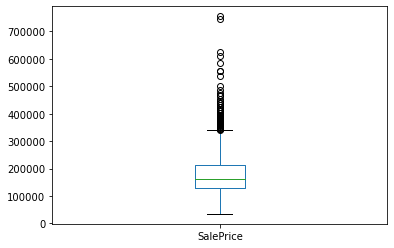

In [12]:
train['SalePrice'].plot(kind = 'box')
plt.show()

In [13]:
train.shape

(1460, 80)

In [14]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###### We will be keeping all the values since we want the machine to learn a realistic pattern. If however there were negative values we would remove it since SalePrice cannot be negative.

### First Submission RMSE: 0.42577(Old) 0.42292(After removing outlier in SalePrice)

* Average

In [15]:
def rmse(ytest,ypred):
    from sklearn.metrics import mean_squared_error
    import numpy as np
    RMSE = np.sqrt(mean_squared_error(np.log(ytest),np.log(ypred)))
    return RMSE

In [16]:
def solution_generator(predictions):
    sub_samp = pd.read_csv('Data/sample_submission.csv')
    return pd.DataFrame({'Id':sub_samp['Id'],'SalePrice':predictions})

In [17]:
solution = solution_generator(train.SalePrice.mean())
solution.to_csv("Submissions/BaseModel.csv",index = False)

#### Univariate Analysis

In [18]:
# for i in train.select_dtypes(np.number).drop('SalePrice',axis = 1).columns:
#     dist_plot(i,train,test,log_transform = False)

###### Distributions for all the numerical columns are same in both train and test set.

In [19]:
# for i in train.select_dtypes(include = "object").drop('MSSubClass',axis = 1).columns:
#     barh_plot(i)

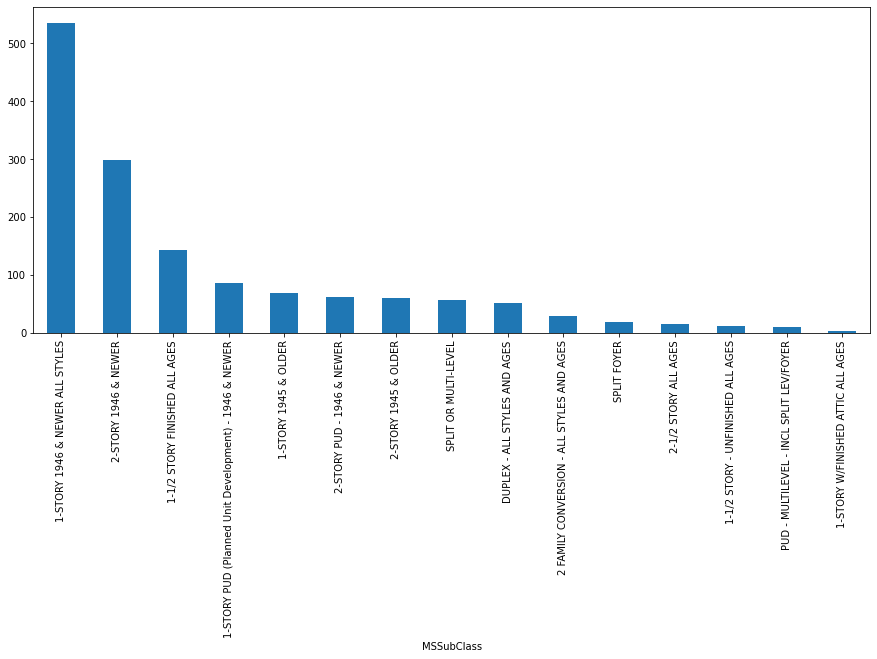

In [20]:
plt.figure(figsize = (15,6))
train.groupby('MSSubClass')['MSSubClass'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

###### Inferences from looking at the value counts for each category.

* **Lot shape** can be converted into 2 features, Regular or irregular.
* **LandSlope and LandContour** could be related.
* We should drop the **Utilities** Column since it has only one value in the test set and hence would have no variation.
* Look to reduce number of **neighbourhood,Condition1,Condition2** parameters.
* **RoofMatl** columns could become CompShg,Tar&Grv,other.
* **Exterior1st,Exterior2nd** BrkComm onwards we could convert as single column in train and testset.
* Convert **Functional,Electrical** into 2 columns only.
* In **GarageType** combine detchd and car port as single val called detachd, attchd and built-in as one val.
* **PavedDrive** and Alley could have some relation.
* **SaleType** Change all CO to contract to reduce a few values in the feature.
* **SaleCondition** could be reduced to 4 values. 

Looking at the columns with SalePrice in bivariate analysis will give us a clearer picture of which columns we can maybe combine.


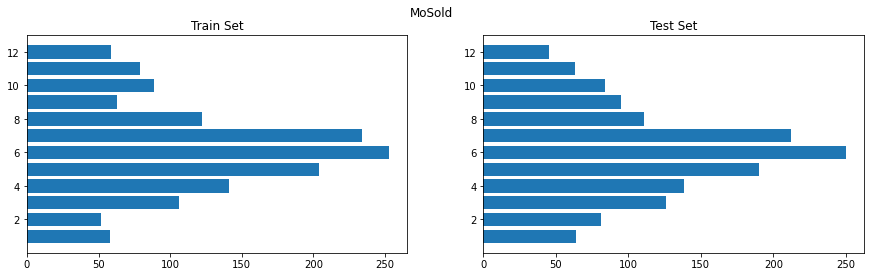

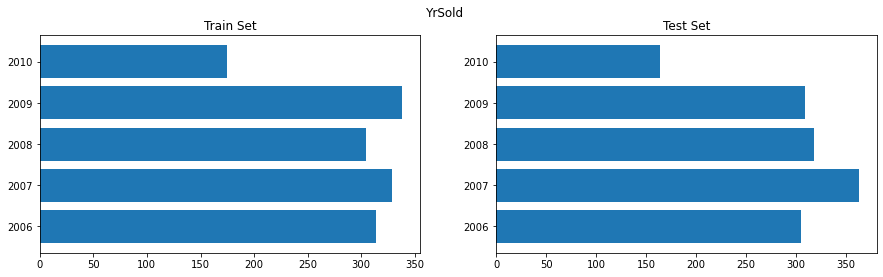

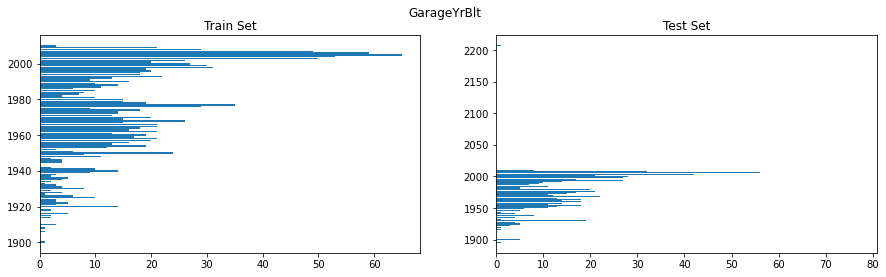

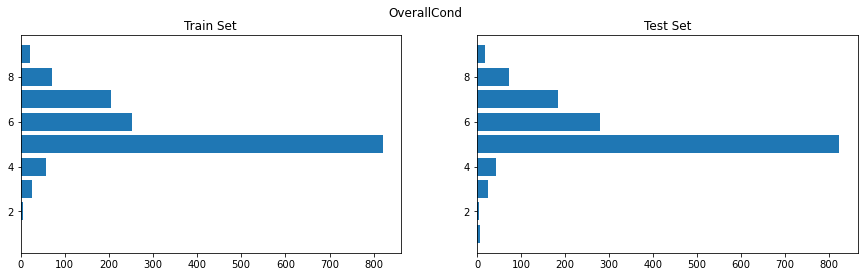

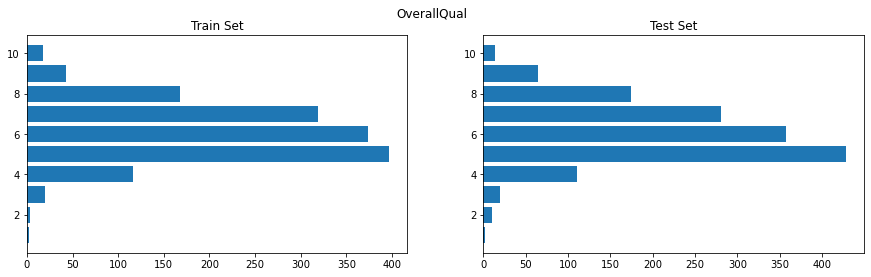

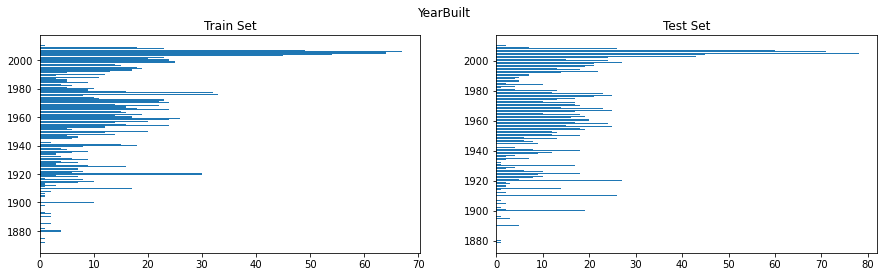

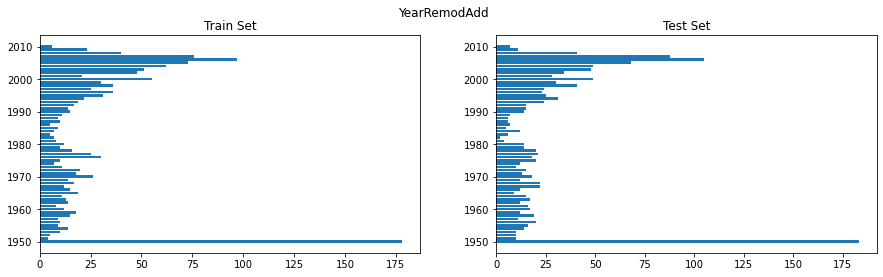

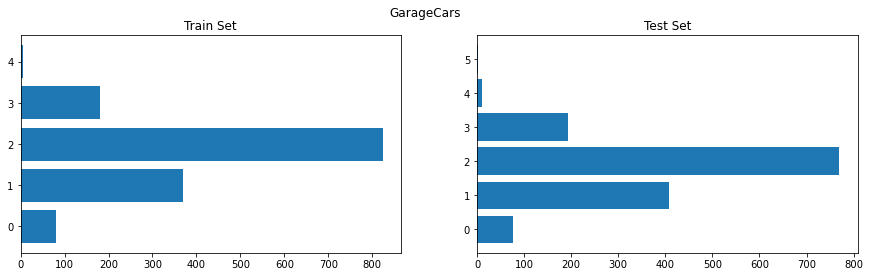

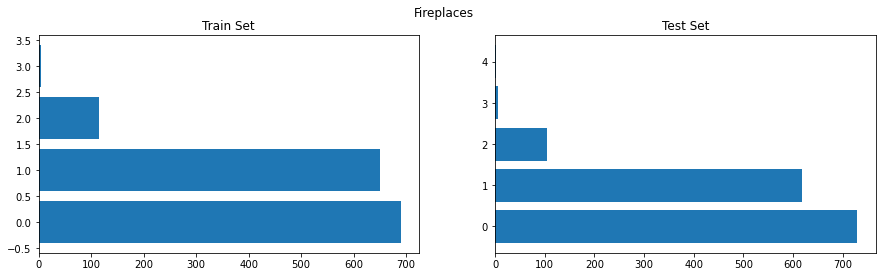

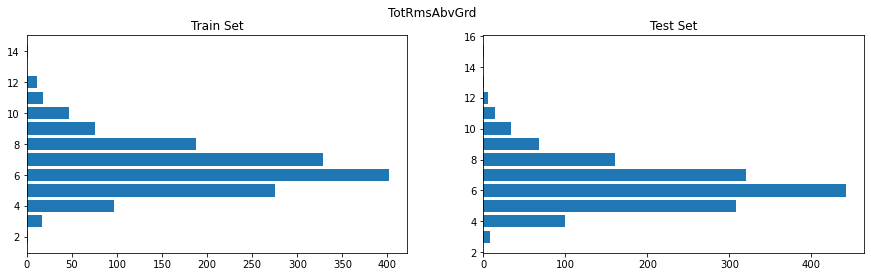

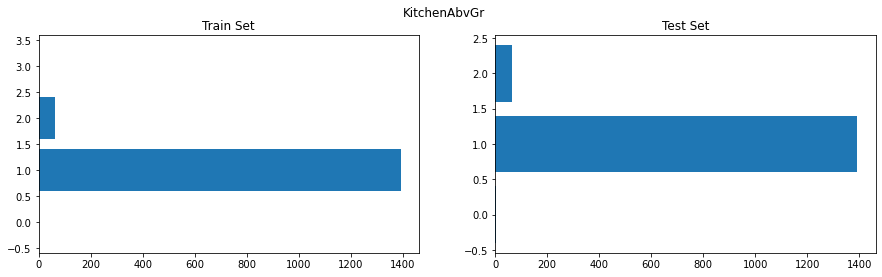

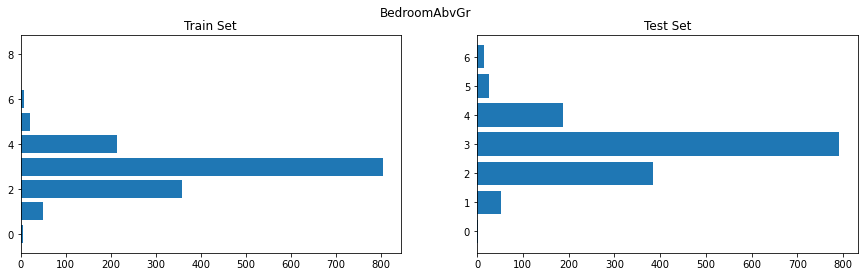

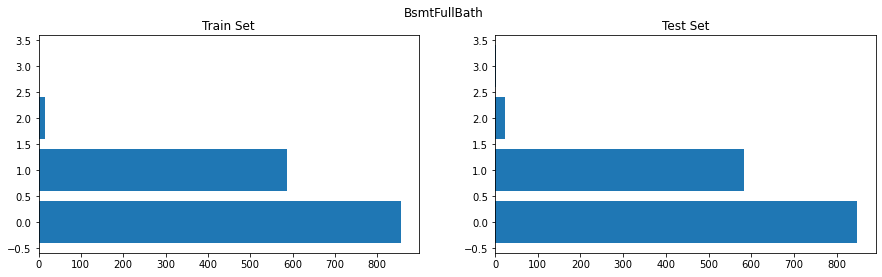

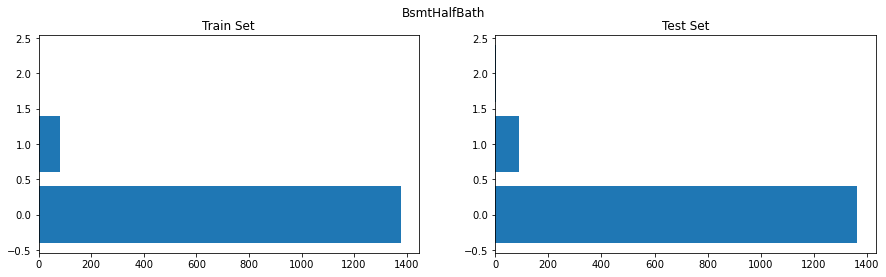

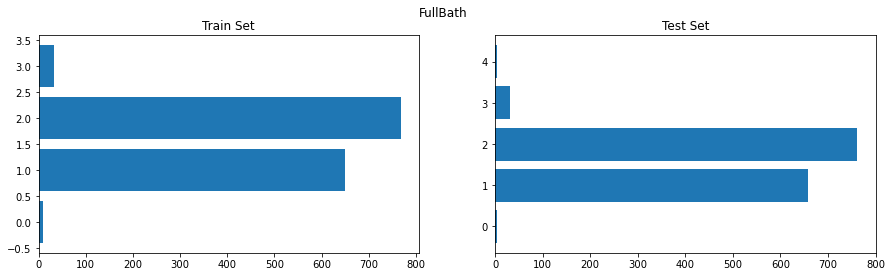

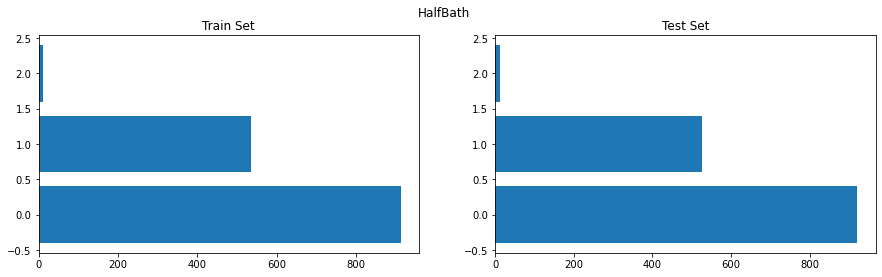

In [21]:
#Numerical variables like year,month,overallcond,overallqual are to be treated as categorical. 
#Let us create their bar plots.
num_bt_cat = train[['MoSold','YrSold','GarageYrBlt','OverallCond',
                    'OverallQual','YearBuilt','YearRemodAdd','GarageCars','Fireplaces',
                    'TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','BsmtFullBath', 
                    'BsmtHalfBath', 'FullBath','HalfBath']]
for i in num_bt_cat:
    barh_plot(i)

* GarageYrBlt has an outlier in the testset. We can try to bin this data as Garage built before 1980 and after 1980.
* Find the difference between **YearBuilt and Year Sold** and **YearRemodAdd and Year Sold**. Thse could be imp features.
* Finally if the imputations are valid then drop any columns that were used to make imputations to prevent collinearity.
* **MonthSold** may or maynot affect price. Bivariate Analysis required.
* **FirePlaces** can be binned into 0,1,more than 1 fire place.
* **HalfBath** can be converted into Yes and No.
* **WoodDeckSF 	OpenPorchSF 	EnclosedPorch 	3SsnPorch 	ScreenPorch 	PoolArea** Maybe can be combined.

#### Bivariate Analysis

In [22]:
bivar_data_continuous = train.select_dtypes(np.number).drop(num_bt_cat.columns,axis = 1)

In [23]:
# fig,ax = plt.subplots(nrows = 5,ncols = 4,figsize = (15,10))
# for variables,plotsubs in zip(bivar_data_continuous.drop(['SalePrice'],axis = 1).columns,ax.flatten()):
    
#     sns.scatterplot(variables,'SalePrice',data = train,ax = plotsubs)
#     plt.tight_layout()
# plt.show()

###### There are many continuous variables that have many zero values which means that that particular property does not have that particular feature. Let us now create boxplots to see whether there is an impact of each category on sale price for each categorical feature.

In [24]:
# for i in train.select_dtypes(include = "object").columns:
#     box_plot(i,train = train)

### Summary of Bivariate Analysis

* From the scatterplots we can see that most of the continuous variables exhibit linear relation with the SalePrice. However there are variables that have zeros in the data. There are also missing values in the features that must be treated. We should also see logically whether it makes sense that properties with a high sale price lack certain ammenities and features.


* **MSSubClass**: 
* **MSZoning,Street,Alley,LandContour,LotConfig,LandSlope**: Features seem to have different median and IQR of SalePrice for each Category.
* **LotShape**: We can combine IR(Irregular) columns into one value so that this feature has only 2 values.
* **Utilities**: Drop this column since it has only one major value AllPub. This will have no predictive power in the model.
* **Neighborhood**:


### Feature Engineering 

In [25]:
#Combining train and test to do feature engineering imputations.
combined = pd.concat((train,test))
train.shape,test.shape,combined.shape

((1460, 80), (1459, 79), (2919, 80))

###### Checking for missing values

In [26]:
many_null = combined.isnull().sum()[(combined.isnull().sum()/len(combined)*100)>80]
#I feel we should drop these features

In [27]:
combined = combined.drop(many_null.index,axis =1)
combined.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0


In [28]:
combined.isnull().sum()[combined.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

###### Imputing the missing values

In [29]:
#MSZoning

# combined['MSZoning'].value_counts()
# combined[combined['MSZoning'].isna()]
# combined.groupby(['MSZoning','MSSubClass'])['MSZoning'].count()
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode().values[0])

In [30]:
#LotFrontage
# combined.groupby('MSZoning')['LotFrontage'].mean()

combined['LotFrontage'] = combined.groupby('MSSubClass')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
combined['LotFrontage'] = combined.groupby('MSZoning')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [31]:
#LandContour and LandSlope relation check
from scipy.stats import chi2_contingency
stat,pval,dfdm,exp_freq = chi2_contingency(pd.crosstab(train['LandContour'],train['LandSlope']))
print(pval)
print("There is significant difference between LandContour and LandSlope since it is less than 0.05. Hence we won't combine the 2 features")

9.713338917216342e-130
There is significant difference between LandContour and LandSlope since it is less than 0.05. Hence we won't combine the 2 features


In [32]:
# Drop Utilities column from combined data
combined.drop('Utilities',axis = 1,inplace = True)

In [33]:
#Look to reduce number of neighbourhood columns

# Find the IQR of saleprice for each category
Q1 = combined.groupby('Neighborhood')['SalePrice'].quantile(0.25)
Q3 = combined.groupby('Neighborhood')['SalePrice'].quantile(0.75)
IQR = Q3-Q1
IQR
n_data = pd.DataFrame({"Q1":Q1,"Q3":Q3,"IQR":IQR})

#now create bins based on differences in IQR
n_data['IQR'].sort_values()

n_data['Div_by_1000'] = n_data['IQR']/1000

n_data.sort_values(by = 'IQR')

#Looking at the sorted values I have decided to create 6 bins for these columns
n_bins_dict = {
               "G1": n_data[(n_data['Div_by_1000']>7) & (n_data['Div_by_1000']<15)].index,
               "G2": n_data[(n_data['Div_by_1000']>20) & (n_data['Div_by_1000']<30)].index,
               "G3": n_data[(n_data['Div_by_1000']>30) & (n_data['Div_by_1000']<45)].index,
               "G4": n_data[(n_data['Div_by_1000']>45) & (n_data['Div_by_1000']<70)].index,
               "G5": n_data[(n_data['Div_by_1000']>70) & (n_data['Div_by_1000']<80)].index,
               "G6": n_data[(n_data['Div_by_1000']>90) & (n_data['Div_by_1000']<100)].index,
               "MaxG": n_data[n_data['Div_by_1000']>100].index
              }

#Assigning the bin values to each unique record
binning = []
for nindex in n_data.index:
    for keys,values in n_bins_dict.items():
        for j in values:
            if nindex == j:
                binning.append(keys)
            else:
                pass
            
n_data['bins'] = binning

    
#Mapping the obtained dictionary to the Neighborhood column
combined['Neighborhood_binned'] = combined['Neighborhood'].map(dict(zip(n_data.index,n_data['bins'])))

combined.drop('Neighborhood',axis = 1,inplace = True)

# box_plot('Neighborhood_binned',combined)

In [34]:
# Looking to reduce Condition parameters
# Let us check whether there is similarity between condition1 and condition2 using Chi Square.
from scipy.stats import chi2_contingency
teststat,pval,dfdm,exp_freq = chi2_contingency(pd.crosstab(combined['Condition1'],combined['Condition2']))
print(pval)
print('Condition1 and Condition2 are independent of each other.')

1.0077728706229287e-197
Condition1 and Condition2 are independent of each other.


In [35]:
#Combine RR columns,Pos
new_feat = ['PosFeat','PosFeat','Next_to_Rail','Next_to_Rail','Next_to_Rail','Next_to_Rail']
old_feat = [ 'PosA','PosN','RRAe', 'RRNn', 'RRAn','RRNe']
cond_feat_dict = dict(zip(old_feat,new_feat))
combined.replace(cond_feat_dict,inplace = True)

In [36]:
#RoofMat1
bin_rm_dict ={'Metal':'Other', 'WdShake':'Other', 'Membran':'Other',
              'Roll':'Other', 'ClyTile':'Other','WdShngl':'Other','Tar&Grv':'Other'}
combined['RoofMatl'] = combined['RoofMatl'].replace(bin_rm_dict)

In [37]:
# Exterior1st

# Find the IQR of saleprice for each category
Q1 = combined.groupby('Exterior1st')['SalePrice'].quantile(0.25)
Q3 = combined.groupby('Exterior1st')['SalePrice'].quantile(0.75)
IQR = Q3-Q1

e1_data = pd.DataFrame({"Q1":Q1,"Q3":Q3,"IQR":IQR})

#now create bins based on differences in IQR

e1_data['IQR_by_1000'] = e1_data['IQR']/1000
e1_data['Exterior1st_count'] = combined.groupby('Exterior1st')['Exterior1st'].count()

e1_data.sort_values(by = 'IQR_by_1000')

#Binning
bin1 = []
bin2 = []
for i in range(len(list(e1_data[e1_data['IQR_by_1000']<75].index))):
    bin1.append("LPrice_prop_ext")
    
for i in range(len(list(e1_data[e1_data['IQR_by_1000']>75].index))):
    bin2.append("HPrice_prop_ext")
    
ext1_dict = dict(zip(list(e1_data[e1_data['IQR_by_1000']<75].index),bin1))
ext1_dict.update(dict(zip(list(e1_data[e1_data['IQR_by_1000']>75].index),bin2)))


combined['Exterior1st'] = combined['Exterior1st'].map(ext1_dict)

combined['Exterior1st'] = combined['Exterior1st'].fillna(method = 'bfill')

In [38]:
# Exterior2nd

# Find the IQR of saleprice for each category
Q1 = combined.groupby('Exterior2nd')['SalePrice'].quantile(0.25)
Q3 = combined.groupby('Exterior2nd')['SalePrice'].quantile(0.75)
IQR = Q3-Q1

e2_data = pd.DataFrame({"Q1":Q1,"Q3":Q3,"IQR":IQR})

#now create bins based on differences in IQR

e2_data['IQR_by_1000'] = e2_data['IQR']/1000
e2_data['Exterior2nd_count'] = combined.groupby('Exterior2nd')['Exterior2nd'].count()

e2_data.sort_values(by = 'IQR_by_1000')

# Binning
bin1 = []
bin2 = []
for i in range(len(list(e2_data[e2_data['IQR_by_1000']<75].index))):
    bin1.append("LPrice_prop_ext")
    
for i in range(len(list(e2_data[e2_data['IQR_by_1000']>75].index))):
    bin2.append("HPrice_prop_ext")
    
ext2_dict = dict(zip(list(e2_data[e2_data['IQR_by_1000']<75].index),bin1))
ext2_dict.update(dict(zip(list(e2_data[e2_data['IQR_by_1000']>75].index),bin2)))

combined['Exterior2nd'] = combined['Exterior2nd'].map(ext2_dict)

combined['Exterior2nd'] = combined['Exterior2nd'].fillna(method = 'bfill')

In [39]:
#Functional
combined['Functional'].value_counts()
comb_vals = ['Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev']
other_vals = []

for i in range(len(comb_vals)):
    other_vals.append("Deductions")
combined['Functional'] = combined['Functional'].replace(dict(zip(comb_vals,other_vals)))

combined['Functional'] = combined['Functional'].fillna(value = 'Typ')

In [40]:
#Electrical
combined['Electrical'] = combined['Electrical'].replace({"FuseA":"Fuse","FuseF":"Fuse","FuseP":"Fuse","Mix":"Fuse"}).fillna('SBrkr')

In [41]:
combined['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [42]:
#GarageType
combined['GarageType'] = combined['GarageType'].replace({"CarPort":"Detchd","BuiltIn":"Attchd","2Types":"Basment"}).fillna('Attchd')

In [43]:
# **SaleType** Change all CO to contract to reduce a few values in the feature.
#Warranty,New,Contract,Other
combined['SaleType'] = combined['SaleType'].replace({'CWD':'WD','ConLI':'Con','ConLw':'Con','ConLD':'Con','COD':'Oth'}).fillna('WD')

In [44]:
#Sale Condition
combined['SaleCondition'] = combined['SaleCondition'].fillna('Normal')

In [45]:
#GarageYrBlt
combined["GarageYrBinned"] = ['Before 2000' if i<2000 else 'After 2000' for i in combined['GarageYrBlt']]
combined = combined.drop('GarageYrBlt',axis = 1)

In [46]:
#Year Built (Bin into before and after 1960)
combined['YearBuilt_Binned'] = ['Before 1960' if i<1960 else 'After 1960' for i in combined['YearBuilt']]

In [47]:
# YearBuilt
combined['YearBlt_diff_YrSold'] = abs(combined['YearBuilt']-combined['YrSold'])
combined.drop('YearBuilt',axis = 1,inplace = True)

In [48]:
#YearRemodAdd
combined["YearRemodAdd_binned"] = ['Before 2000' if i<2000 else 'After 2000' for i in combined['YearRemodAdd']]
combined = combined.drop('YearRemodAdd',axis = 1)


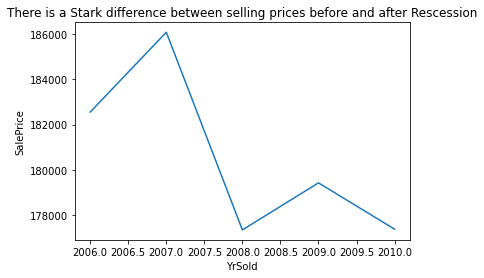

In [49]:
#Year Sold

sns.lineplot(combined['YrSold'],combined['SalePrice'])
plt.title('There is a Stark difference between selling prices before and after Rescession')
plt.show()

#bin YrSold into before and after rescession which hit in 2008

combined['YrSold_Binned'] = ['Before Rescession' if i<2008 else 'After Rescession' for i in combined['YrSold']]
combined = combined.drop('YrSold',axis = 1)

In [50]:
#MoSold
combined['MoSold_binned'] = ["1st half" if i<7 else "2nd half" for i in combined['MoSold']]
combined.drop('MoSold',axis = 1,inplace = True)

In [51]:
#FirePlaces (No imputations required)

In [52]:
combined['Extra_Area'] = combined['WoodDeckSF']+combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch']+combined['PoolArea']
combined.drop(train[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']].columns,axis = 1,inplace = True)

In [53]:
#LotShape
combined['LotShape'] = combined['LotShape'].replace({'IR1':'IR','IR3':'IR'})

In [54]:
combined.isnull().sum()[combined.isnull().sum()!=0] #These values have still not been treated as yet

MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
FireplaceQu     1420
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SalePrice       1459
dtype: int64

## Creating an LR model for checking

In [55]:
checking = combined.dropna(axis = 1,how = 'any').drop('MSSubClass',axis = 1)

In [56]:
t2 = pd.get_dummies(checking,drop_first = True)
t1 = pd.concat((t2,combined['SalePrice']),axis = 1)
train_c = t1[:1460]
test_c = t1[1460:].drop('SalePrice',axis = 1)

### Applying Linear Regression to check if any difference New RMSE: 0.18906. No change.

* Post feature engineering of half the variables we have seen a massive jump from the base submission which was RMSE of 0.42577(old) 0.42292(After removing outlier in SalePrice)

In [57]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_c.drop('SalePrice',axis = 1)
y = train_c.SalePrice
x1 = sm.add_constant(x,has_constant = 'add')

x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model = OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     62.30
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:00:47   Log-Likelihood:                -13654.
No. Observations:                1168   AIC:                         2.752e+04
Df Residuals:                    1062   BIC:                         2.806e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [58]:
good_var = model.pvalues[model.pvalues<0.05].index

In [59]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_c[good_var]
y = train_c.SalePrice
x1 = sm.add_constant(x,has_constant = 'add')

x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model = OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:00:47   Log-Likelihood:                -13705.
No. Observations:                1168   AIC:                         2.748e+04
Df Residuals:                    1134   BIC:                         2.765e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [60]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train RMSE:",rmse(y_train,pred_train))
print("Test RMSE:",rmse(y_test,pred_test))
# The Test RMSE is greater than the train RMSE. This means the model is overfitting.

Train RMSE: 0.1669363482859783
Test RMSE: 0.19174924366672785


In [62]:
print("Train R2_Score:",r2_score(y_train,pred_train))
print("Test R2_Score:",r2_score(y_test,pred_test))

Train R2_Score: 0.8476434822004095
Test R2_Score: 0.8063952111399656


In [63]:
t = sm.add_constant(test_c[good_var])
solution_generator(model.predict(t)).to_csv("Submissions/OLSRegression_f_incomplete.csv",index = False)

### Training on entire train set to see if we see any improvement RMSE: 0.18906

* There is some difference in training on the split set or the entire train set. This means our split train set is covering all major data points required for making predictions.

In [64]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_c[good_var]
y = train_c.SalePrice
x1 = sm.add_constant(x,has_constant = 'add')

#x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model_b = OLS(y,x1).fit()
print(model_b.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     226.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:00:48   Log-Likelihood:                -17208.
No. Observations:                1460   AIC:                         3.448e+04
Df Residuals:                    1426   BIC:                         3.466e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [65]:
t = sm.add_constant(test_c[good_var])
solution_generator(model.predict(t)).to_csv("Submissions/OLSRegression_f_incomplete_fulltrain.csv",index = False)

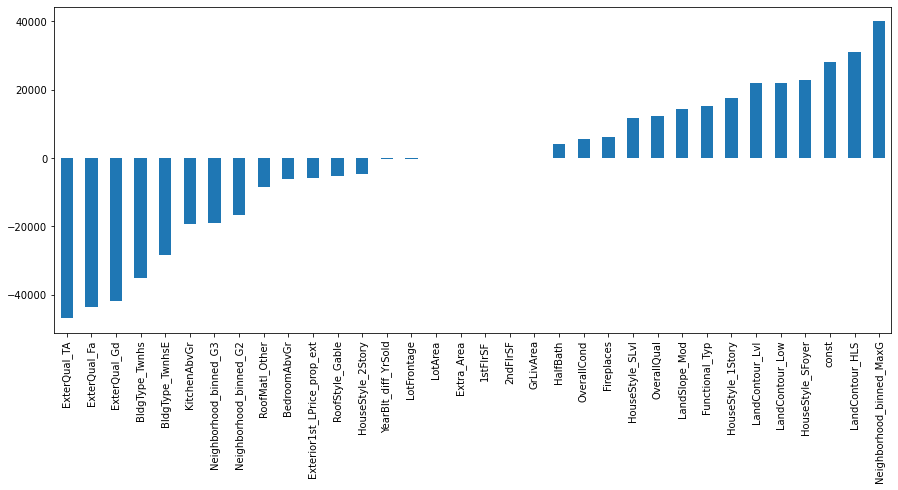

In [66]:
plt.figure(figsize = (15,6))
model_b.params.sort_values().plot(kind = 'bar')
plt.show()

### Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

x = train_c[good_var]
y = train_c.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

param = {'alpha':[0.001,0.005,0.01,0.05,1,1.5,2,10]}

grid = GridSearchCV(estimator = Lasso(),param_grid = param,cv = 5)
grid.fit(x_train,y_train)

lasso = Lasso(alpha = grid.best_params_['alpha'],max_iter = 1000)
lasso.fit(x_train,y_train)
l_pred_tr = lasso.predict(x_train)
l_pred_te = lasso.predict(x_test)

print("Lasso train log RMSE:" ,rmse(y_train,l_pred_tr))
print("Lasso test log RMSE:" ,rmse(y_test,l_pred_te))
print("Best Alpha parameter:",grid.best_params_['alpha'])


Lasso train log RMSE: 0.16693534631544257
Lasso test log RMSE: 0.19174635356220338
Best Alpha parameter: 0.001


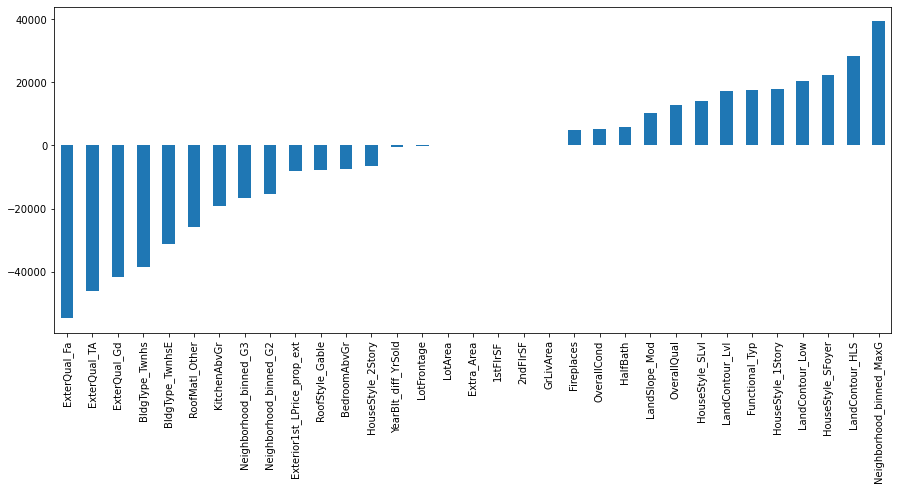

In [68]:
plt.figure(figsize = (15,6))
pd.Series(lasso.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

### Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

x = train_c[good_var]
y = train_c.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

param = {'alpha':[0.001,0.005,0.01,0.05,0.1,1,1.5,2,10]}

grid = GridSearchCV(estimator = Ridge(),param_grid = param,cv = 10)
grid.fit(x_train,y_train)

ridge = Ridge(alpha = grid.best_params_['alpha'],max_iter = 1000)
ridge.fit(x_train,y_train)
r_pred_tr = ridge.predict(x_train)
r_pred_te = ridge.predict(x_test)

print("Ridge train log RMSE:" ,rmse(y_train,r_pred_tr))
print("Ridge test log RMSE:" ,rmse(y_test,r_pred_te))
print("Best Alpha parameter:",grid.best_params_['alpha'])


Ridge train log RMSE: 0.16774713131009542
Ridge test log RMSE: 0.18173316067846132
Best Alpha parameter: 2


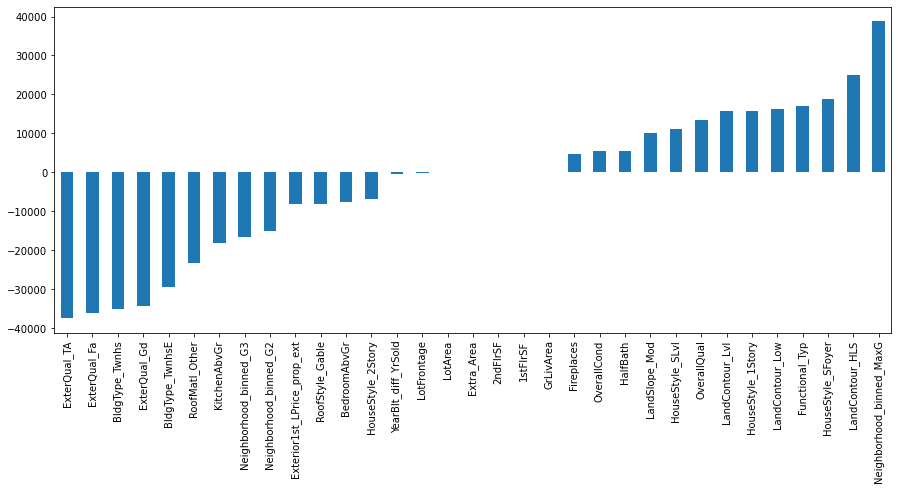

In [70]:
plt.figure(figsize = (15,6))
pd.Series(ridge.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

### Elastic Net RMSE: 0.17362

In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

x = train_c[good_var]
y = train_c.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

param = {
         'alpha':[0.001,0.005,0.01],
         'l1_ratio':[0.05,0.1,0.5] 
        }

grid = GridSearchCV(estimator = ElasticNet(),param_grid = param,cv = 10,verbose = 0)
grid.fit(x_train,y_train)

enet = ElasticNet(alpha = grid.best_params_['alpha'],l1_ratio = grid.best_params_['l1_ratio'],max_iter = 1000)
enet.fit(x_train,y_train)
e_pred_tr = ridge.predict(x_train)
e_pred_te = ridge.predict(x_test)

print("ElasticNet train log RMSE:" ,rmse(y_train,e_pred_tr))
print("ElasticNet test log RMSE:" ,rmse(y_test,e_pred_te))
print("Best Alpha parameter:",grid.best_params_['alpha'])
print("Best L1 ratio parameter:",grid.best_params_['l1_ratio'])
#Alpha = 0.005
#l1 = 0.1

ElasticNet train log RMSE: 0.16774713131009542
ElasticNet test log RMSE: 0.18173316067846132
Best Alpha parameter: 0.005
Best L1 ratio parameter: 0.1


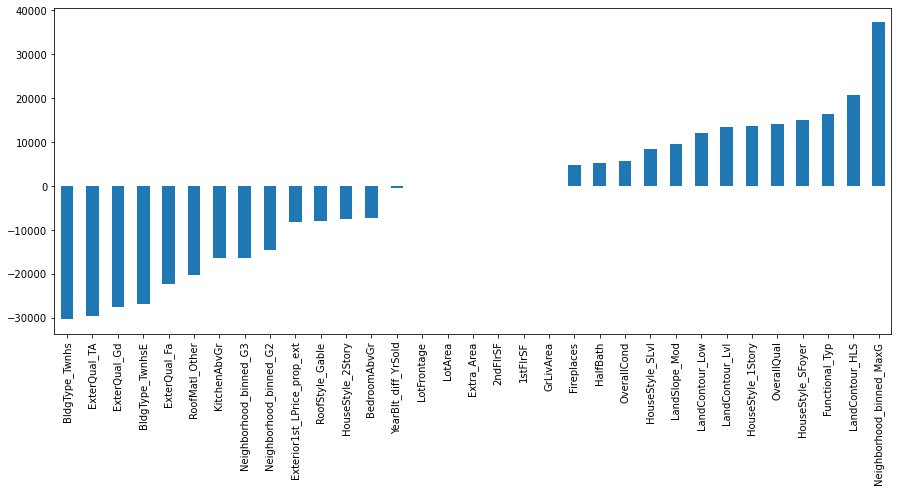

In [72]:
plt.figure(figsize = (15,6))
pd.Series(enet.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

In [73]:
#ElasticNet seems to reduce the overfitting problem slightly. 

In [74]:
t = test_c[good_var]
solution_generator(enet.predict(t)).to_csv("Submissions/EnetRegression_f_incomplete_fulltrain.csv",index = False)

### Resuming with removing null values from rest of the columns

###### Filling columns having only 1-2 missing value with median or mode.

In [75]:
combined.isnull().sum()[combined.isnull().sum()==1] #These values have still not been treated as yet

BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
KitchenQual    1
GarageCars     1
GarageArea     1
dtype: int64

In [76]:
#Handling columns with only 1 missing value
for i in combined.isnull().sum()[combined.isnull().sum()==1].index:
    if combined[i].dtypes != 'O':
        combined[i] = combined[i].median()

In [77]:
combined['KitchenQual']=combined[combined.isnull().sum()[combined.isnull().sum()==1].index].fillna(combined[combined.isnull().sum()[combined.isnull().sum()==1].index].mode().values[0][0])

In [78]:
#Handling columns having 2 missing values
combined.BsmtHalfBath = combined.BsmtHalfBath.fillna(0)
combined.BsmtFullBath = combined.BsmtFullBath.fillna(0)

In [79]:
combined.isnull().sum()[combined.isnull().sum()!=0]

MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageFinish     159
GarageQual       159
GarageCond       159
SalePrice       1459
dtype: int64

In [80]:
#MasVnrArea
combined['MasVnrArea'] = combined[combined.isnull().sum()[combined.isnull().sum()!=0].index].select_dtypes(np.number)['MasVnrArea'].fillna(0)

In [81]:
#MasVnrType
combined['MasVnrType'] = combined['MasVnrType'].fillna(combined['MasVnrType'].mode().values[0])

In [82]:
#BamtQual
for i in combined.drop('SalePrice',axis = 1).isnull().sum()[combined.isnull().sum()!=0].index:
    combined[i] = combined[i].fillna('None')

### All missing values have been handled. let us again split our data into train and test.

In [83]:
data_enc = pd.get_dummies(combined.drop('MSSubClass',axis = 1),drop_first = True)
train_data = data_enc[:1460]
test_data = data_enc[1460:].drop("SalePrice",axis = 1)

In [84]:
train_data.shape,test_data.shape

((1460, 165), (1459, 164))

### Let us first apply a Linear Regression model

In [85]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_data.drop('SalePrice',axis = 1)
y = train_data.SalePrice
x1 = sm.add_constant(x,has_constant = 'add')

x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model1 = OLS(y_train,x_train).fit()

#Making predictions
pred_train_f = model1.predict(x_train)
pred_test_f = model1.predict(x_test)

model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     54.30
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:01:31   Log-Likelihood:                -13516.
No. Observations:                1168   AIC:                         2.734e+04
Df Residuals:                    1016   BIC:                         2.811e+04
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0191      0.044      0.435      0.663      -0.067       0.105
LotFrontage                      -197.7068     55.528     -3.560      0.000    -306.670     -88.744
LotArea                             0.3748      0.156      2.401      0.017       0.068       0.681
OverallQual                       1.08e+04   1303.425      8.285      0.000    8240.849    1.34e+04
OverallCond                      5308.2182   1116.481      4.754      0.000    3117.345    7499.092
MasVnrArea                         20.2926      7.446      2.725      0.007       5.682      34.903
BsmtFinSF1                          7.0532     16.198      0.435      0.663     -24.732      38.838
BsmtFinSF2                      -7.898e-08   2.51e-08     -3.144      0.002   -1.28e-07   -2.97e-08
BsmtUnfSF                           8.9386     20.528      0.435      0.663     -31.343      49.220
TotalBsmtSF                        18.9395     43.495      0.435      0.663     -66.410     104.289
1stFlrSF                           17.0104      7.135      2.384      0.017       3.010      31.011
2ndFlrSF                           30.2786      7.049      4.295      0.000      16.446      44.111
LowQualFinSF                       -7.8491     17.992     -0.436      0.663     -43.155      27.457
GrLivArea                          39.4398      6.875      5.737      0.000      25.950      52.930
BsmtFullBath                     7162.2459   2306.151      3.106      0.002    2636.882    1.17e+04
BsmtHalfBath                     1603.6413   4183.698      0.383      0.702   -6606.037    9813.319
FullBath                         5964.8816   2880.659      2.071      0.039     312.161    1.16e+04
HalfBath                         6438.0619   2692.607      2.391      0.017    1154.355    1.17e+04
BedroomAbvGr                    -3879.7903   1706.422     -2.274      0.023   -7228.306    -531.275
KitchenAbvGr                    -1.535e+04   7600.066     -2.020      0.044   -3.03e+04    -437.340
TotRmsAbvGrd                     2553.4436   1207.943      2.114      0.035     183.096    4923.791
Fireplaces                       1125.8203   3182.057      0.354      0.724   -5118.335    7369.976
GarageCars                          0.0383      0.088      0.435      0.663      -0.134       0.211
GarageArea                          9.1874     21.099      0.435      0.663     -32.215      50.590
MiscVal                            -0.8161      1.680     -0.486      0.627      -4.112       2.480
YearBlt_diff_YrSold              -146.8091     99.436     -1.476      0.140    -341.933      48.314
Extra_Area                         16.0073      6.057      2.643      0.008       4.121      27.894
MSZoning_FV                      2.965e+04   1.34e+04      2.212      0.027    3344

In [86]:
#Finding RMSE values for both train and test sets

print("Train log RMSE:",rmse(y_train,pred_train_f))
print("Test log RMSE:",rmse(y_test,pred_test_f))

Train log RMSE: 0.13408662367587051
Test log RMSE: 0.15164590602097736


In [87]:
from sklearn.metrics import mean_squared_error
print("Train RMSE raw:",np.sqrt(mean_squared_error(y_train,pred_train_f)))
print("Test RMSE raw:",np.sqrt(mean_squared_error(y_test,pred_test_f)))
#This model is clearly overfitting

Train RMSE raw: 25668.323452242566
Test RMSE raw: 36004.25342276475


### Let us filter features based on the p-value now and recreate a model.

In [88]:
model1.pvalues[model1.pvalues<0.05]

LotFrontage                    3.873213e-04
LotArea                        1.654618e-02
OverallQual                    3.707844e-16
OverallCond                    2.277210e-06
MasVnrArea                     6.532230e-03
BsmtFinSF2                     1.712825e-03
1stFlrSF                       1.730137e-02
2ndFlrSF                       1.911489e-05
GrLivArea                      1.270449e-08
BsmtFullBath                   1.950820e-03
FullBath                       3.864213e-02
HalfBath                       1.698307e-02
BedroomAbvGr                   2.319561e-02
KitchenAbvGr                   4.366147e-02
TotRmsAbvGrd                   3.476887e-02
Extra_Area                     8.353716e-03
MSZoning_FV                    2.720628e-02
LandContour_HLS                2.815393e-03
LandContour_Lvl                5.240799e-03
Condition1_Norm                6.241566e-03
BldgType_Twnhs                 4.389503e-07
BldgType_TwnhsE                1.537432e-09
HouseStyle_1Story              4

In [89]:
good_var_f = model1.pvalues[model1.pvalues<0.05].index

In [90]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x_f = train_data[good_var_f]
y_f = train_data.SalePrice
x1_f = sm.add_constant(x_f,has_constant = 'add')

x_tr,x_te,y_tr,y_te = train_test_split(x1_f,y_f,test_size = 0.2,random_state = 6)

model_f = OLS(y_tr,x_tr).fit()

#Making predictions
pred_train_f1 = model_f.predict(x_tr)
pred_test_f1 = model_f.predict(x_te)

model_f.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:01:32   Log-Likelihood:                -13607.
No. Observations:                1168   AIC:                         2.731e+04
Df Residuals:                    1119   BIC:                         2.756e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2.814e+04   1.47e+04      1.912      0.056    -737.947     5.7e+04
LotFrontage                  -168.4293     49.437     -3.407      0.001    -265.428     -71.430
LotArea                         0.2590      0.118      2.192      0.029       0.027       0.491
OverallQual                  1.155e+04   1188.193      9.716      0.000    9213.718    1.39e+04
OverallCond                  5189.1032    869.834      5.966      0.000    3482.414    6895.793
MasVnrArea                     19.8741      5.625      3.533      0.000       8.836      30.912
BsmtFinSF2                  -1.646e-07   3.67e-08     -4.485      0.000   -2.37e-07   -9.26e-08
1stFlrSF                       40.7117     23.643      1.722      0.085      -5.677      87.100
2ndFlrSF                       37.1834     23.500      1.582      0.114      -8.926      83.293
GrLivArea                      23.4892     23.436      1.002      0.316     -22.495      69.473
BsmtFullBath                 1.169e+04   1815.497      6.437      0.000    8124.047    1.52e+04
FullBath                     7319.1585   2603.596      2.811      0.005    2210.678    1.24e+04
HalfBath                     9081.3526   2425.597      3.744      0.000    4322.123    1.38e+04
BedroomAbvGr                -4902.3145   1612.608     -3.040      0.002   -8066.390   -1738.239
KitchenAbvGr                -2.543e+04   4569.811     -5.564      0.000   -3.44e+04   -1.65e+04
TotRmsAbvGrd                 2116.6500   1153.433      1.835      0.067    -146.485    4379.785
Extra_Area                     15.6514      5.838      2.681      0.007       4.196      27.107
MSZoning_FV                  1.378e+04   4422.218      3.115      0.002    5100.247    2.25e+04
LandContour_HLS              1.632e+04   5784.588      2.821      0.005    4969.293    2.77e+04
LandContour_Lvl              1.002e+04   3646.911      2.746      0.006    2859.792    1.72e+04
Condition1_Norm              1.183e+04   2492.683      4.746      0.000    6939.888    1.67e+04
BldgType_Twnhs              -3.807e+04   6044.494     -6.298      0.000   -4.99e+04   -2.62e+04
BldgType_TwnhsE             -2.679e+04   3908.356     -6.856      0.000   -3.45e+04   -1.91e+04
HouseStyle_1Story            1.305e+04   3147.246      4.146      0.000    6873.756    1.92e+04
HouseStyle_2.5Fin           -3.366e+04   1.64e+04     -2.058      0.040   -6.57e+04   -1570.311
HouseStyle_2Story           -7782.4247   3603.777     -2.160      0.031   -1.49e+04    -711.504
RoofStyle_Gable             -1.352e+04   6485.317     -2.085      0.037   -2.62e+04    -794.960
RoofStyle_Hip               -8240.5814   6797.141     -1.212      0.226   -2.16e+04    5095.995
RoofMatl_Other              -3.305e+04   8117.419     -4.071      0.000    -4.9e+04   -1.71e+04
Exterior1st

In [91]:
#Finding RMSE values for both train and test sets

print("Train log RMSE:",rmse(y_train,pred_train_f))
print("Test log RMSE:",rmse(y_test,pred_test_f))

Train log RMSE: 0.13408662367587051
Test log RMSE: 0.15164590602097736


In [92]:
from sklearn.metrics import mean_squared_error
print("Train RMSE raw:",np.sqrt(mean_squared_error(y_train,pred_train_f)))
print("Test RMSE raw:",np.sqrt(mean_squared_error(y_test,pred_test_f)))
#Post filtering the model is still overfitting however adj r2 score has not changed much.

Train RMSE raw: 25668.323452242566
Test RMSE raw: 36004.25342276475


In [93]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x_f = train_data[good_var_f]
y_f = train_data.SalePrice
x1_f = sm.add_constant(x_f,has_constant = 'add')

#x_tr,x_te,y_tr,y_te = train_test_split(x1_f,y_f,test_size = 0.2,random_state = 6)

model_f = OLS(y_f,x1_f).fit()

#Making predictions
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:01:32   Log-Likelihood:                -17104.
No. Observations:                1460   AIC:                         3.431e+04
Df Residuals:                    1409   BIC:                         3.458e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1.489e+04   1.37e+04      1.084      0.279   -1.21e+04    4.18e+04
LotFrontage                  -142.0428     47.419     -2.995      0.003    -235.062     -49.023
LotArea                         0.3674      0.093      3.969      0.000       0.186       0.549
OverallQual                   1.08e+04   1107.018      9.757      0.000    8629.832     1.3e+04
OverallCond                  5584.7392    808.179      6.910      0.000    3999.375    7170.103
MasVnrArea                     27.6417      5.257      5.258      0.000      17.329      37.954
BsmtFinSF2                  -3.813e-08   1.31e-08     -2.917      0.004   -6.38e-08   -1.25e-08
1stFlrSF                       39.3989     21.449      1.837      0.066      -2.677      81.474
2ndFlrSF                       39.4377     21.173      1.863      0.063      -2.097      80.972
GrLivArea                      21.4019     21.265      1.006      0.314     -20.312      63.116
BsmtFullBath                 1.195e+04   1728.849      6.911      0.000    8556.804    1.53e+04
FullBath                     8208.3953   2426.231      3.383      0.001    3448.982     1.3e+04
HalfBath                     7516.3034   2273.844      3.306      0.001    3055.820     1.2e+04
BedroomAbvGr                -4918.1677   1527.704     -3.219      0.001   -7914.987   -1921.348
KitchenAbvGr                -2.516e+04   4351.715     -5.782      0.000   -3.37e+04   -1.66e+04
TotRmsAbvGrd                 2578.1887   1094.548      2.355      0.019     431.070    4725.307
Extra_Area                     14.8718      5.505      2.701      0.007       4.073      25.671
MSZoning_FV                   1.43e+04   4267.684      3.350      0.001    5925.831    2.27e+04
LandContour_HLS              1.782e+04   5432.559      3.281      0.001    7165.278    2.85e+04
LandContour_Lvl              1.292e+04   3435.842      3.761      0.000    6182.962    1.97e+04
Condition1_Norm              1.398e+04   2404.338      5.813      0.000    9259.024    1.87e+04
BldgType_Twnhs              -3.696e+04   5489.288     -6.733      0.000   -4.77e+04   -2.62e+04
BldgType_TwnhsE             -2.552e+04   3744.257     -6.815      0.000   -3.29e+04   -1.82e+04
HouseStyle_1Story            1.491e+04   3005.900      4.960      0.000    9011.315    2.08e+04
HouseStyle_2.5Fin           -2.939e+04   1.43e+04     -2.049      0.041   -5.75e+04   -1250.328
HouseStyle_2Story           -7603.8137   3449.175     -2.205      0.028   -1.44e+04    -837.743
RoofStyle_Gable             -5844.7732   6338.042     -0.922      0.357   -1.83e+04    6588.240
RoofStyle_Hip               -3183.7711   6636.745     -0.480      0.632   -1.62e+04    9835.193
RoofMatl_Other              -1.162e+04   7625.856     -1.523      0.128   -2.66e+04    3343.554
Exterior1st

In [94]:
test_w_const = sm.add_constant(test_data[good_var_f])
solution_generator(model_f.predict(test_w_const)).to_csv("Submissions/LinearRegression_all_features_filtered.csv",index = False)

### After including and filtering all features we got an RMSE of 0.35055. after outlier treatment: 0.35313

* The model is clearly overfitting as is visible in our RMSE scores as well.
* We also have not checked the 5 assumptions of LinearRegression:
                        
                        - Linearity (Rainbow test)
                        - Normality (Shapiro)
                        - Heteroskedasticity of residual vs fittedvalues (breuschpagan)
                        - Mulit-collinearity (VIF)
                        - Auto-Correlation (Durbin Watson) 2- no correlation

* We will now perform the above checks.



In [95]:
#Linearity
import statsmodels.api as sm

print(sm.stats.diagnostic.linear_rainbow(model_b))
print(sm.stats.diagnostic.linear_rainbow(model_f))

# Our best and latest Models pass test of linearity.

(0.9855638999400915, 0.5771564247867995)
(0.9774698867303122, 0.6191523591528251)


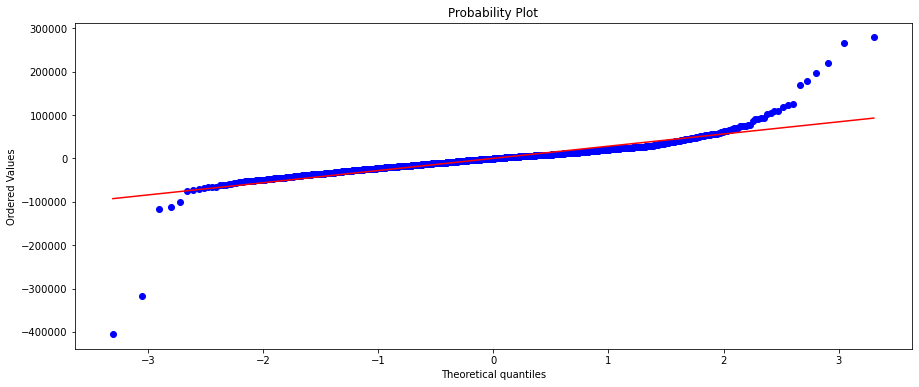

In [96]:
#Normality
from scipy.stats import probplot
plt.figure(figsize = (15,6))
probplot(model_b.resid,plot = plt)
plt.show()#

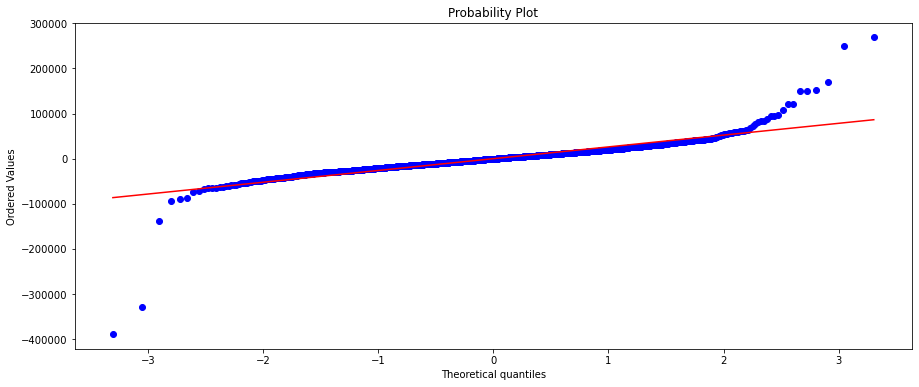

In [97]:
from scipy.stats import probplot
plt.figure(figsize = (15,6))
probplot(model_f.resid,plot = plt)
plt.show()#

In [98]:
print(stats.shapiro(model_b.resid))
print(stats.shapiro(model_f.resid))

#Both models fail the test of normality.

(0.7824816107749939, 2.622347907183533e-40)
(0.7804933786392212, 1.933427543167523e-40)


In [99]:
#Heteroskedasticity
sm.stats.diagnostic.het_breuschpagan(model_f.resid,x)
#data tends to be heteroskedastic

(710.7977515827984,
 1.9393505633895463e-69,
 8.098390594039698,
 1.936553273857341e-109)

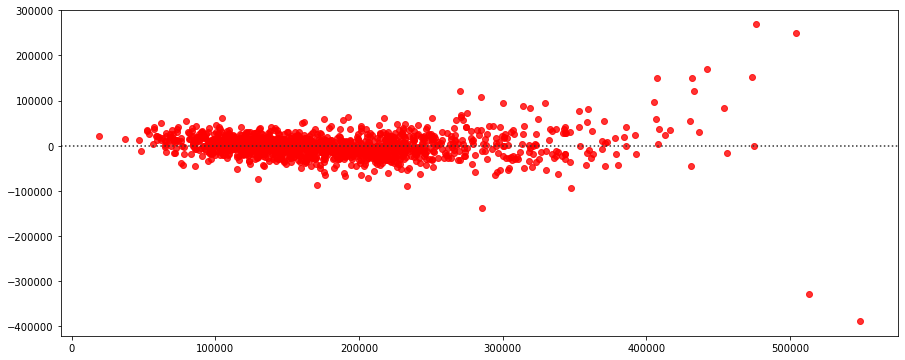

In [100]:
plt.figure(figsize = (15,6))
sns.residplot(model_f.fittedvalues,model_f.resid,color = 'r')
plt.show()
#There is a clear pattern in the data. Perhaps linear regression is not a perfect fit for the model.

In [101]:
#Auto-Correlation
from statsmodels.stats.api import durbin_watson
durbin_watson(model_f.resid)
#The overall model tends to not show any correlation since the value is between 1.5 and 2.5.

1.949719017974636

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
dt = x_tr.drop(['const','ExterCond_Po','BsmtFinSF2','BsmtQual_None',
                'BsmtCond_None','BsmtExposure_None','GarageCond_TA',
                'GrLivArea','TotRmsAbvGrd','OverallQual','RoofStyle_Gable',
                'OverallCond','KitchenAbvGr','1stFlrSF','BedroomAbvGr','GarageQual_TA',
               'FullBath','LotFrontage','Functional_Typ','LandContour_Lvl'],axis = 1) 
mylist = []
for i in range(len(dt.columns)):
    mylist.append(vif(dt.values,i))

In [103]:
features = dt.columns
v_score = pd.DataFrame({"Features":features,"VIF":mylist})
v_score

,Features,VIF
0,LotArea,3.226507
1,MasVnrArea,1.701334
2,2ndFlrSF,8.559206
3,BsmtFullBath,1.969092
4,HalfBath,2.925257
5,Extra_Area,2.826725
6,MSZoning_FV,1.228546
7,LandContour_HLS,1.088398
8,Condition1_Norm,6.563996
9,BldgType_Twnhs,1.150251


In [104]:
#Remove parameters one by one to see which parameters are causing the collinearity.

In [105]:
#The above parameters seem to have an acceptable VIF. Let us try to create models based on the above features.

### Creating sklearn models

In [106]:
train_f = train_data[v_score[v_score['VIF']<11]['Features']]
train_f = pd.concat((train_f,train_data['SalePrice']),axis = 1)
test_f = test_data[v_score[v_score['VIF']<11]['Features']]

In [107]:
train_data1 = train_f
test_data1  = test_f

### Linear Regression RMSE: 0.68934. 0.46177(After removing outliers) Linear Regression has done even worse than the baseline model. Which means there is a major effect of certain coefficients which has to be reduced.

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

x = train_data1.drop('SalePrice',axis = 1)
y = train_data1.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred_test = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)

print("Train RMSE:",rmse(y_train,lr_pred_train))
print("Test RMSE:",rmse(y_test,lr_pred_test))

print("Train r2_score",r2_score(y_train,pred_train))
print("Test r2_score",r2_score(y_test,pred_test))

#A higher train r2_score means the model is overfitting. We may have to look at our features again.

Train RMSE: 0.2126773999961822
Test RMSE: 0.23692527351642692
Train r2_score 0.8476434822004095
Test r2_score 0.8063952111399656


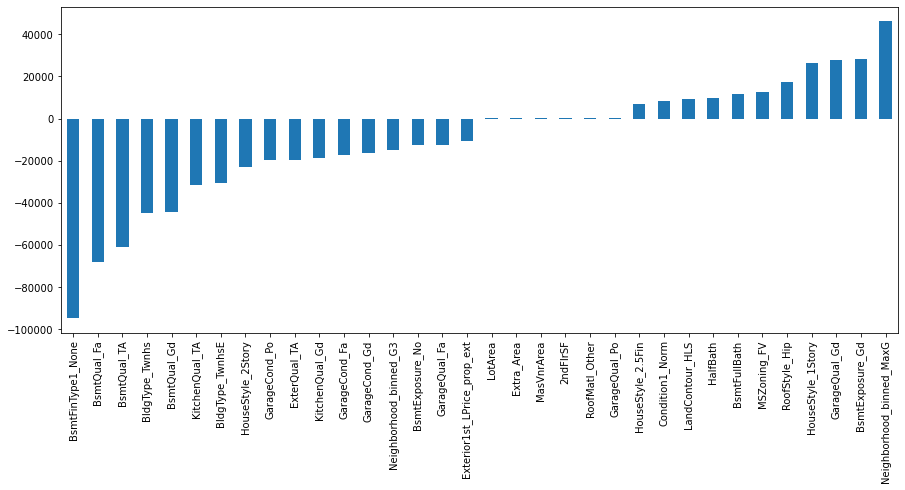

In [109]:
plt.figure(figsize = (15,6))
pd.Series(lr.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

**We can clearly see that we have extreme coefficient values. This data requires regularization desperately!**

In [110]:
solution_generator(lr.predict(test_data1)).to_csv('Submissions/LinearReg_fulldata.csv',index = False)

In [111]:
solution_generator(lr.predict(test_data1))

,Id,SalePrice
0,1461,119731.628427
1,1462,171942.852407
2,1463,173874.126668
3,1464,174269.820615
4,1465,200625.407055
...,...,...
1454,2915,67138.701761
1455,2916,82438.589251
1456,2917,154222.786679
1457,2918,112391.329863


# Adding more number of features has caused linear regression to not perform as well as before.

In [112]:
# Let us consider all the features and let Lasso,Rdige and ElasticNet select features for us.

### Lasso Regression

In [113]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

x = train_data1.drop('SalePrice',axis = 1)
y = train_data1.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

param = {'alpha':[0.001,0.005,0.01,0.05]}

grid = GridSearchCV(estimator = Lasso(),param_grid = param,cv = 5)
grid.fit(x_train,y_train)

lasso = Lasso(alpha = grid.best_params_['alpha'],max_iter = 1000)
lasso.fit(x_train,y_train)
l_pred_tr = lasso.predict(x_train)
l_pred_te = lasso.predict(x_test)

print("Lasso train log RMSE:" ,rmse(y_train,l_pred_tr))
print("Lasso test log RMSE:" ,rmse(y_test,l_pred_te))
print("Best Alpha parameter:",grid.best_params_['alpha'])


Lasso train log RMSE: 0.21267631845230225
Lasso test log RMSE: 0.23692348937830468
Best Alpha parameter: 0.05


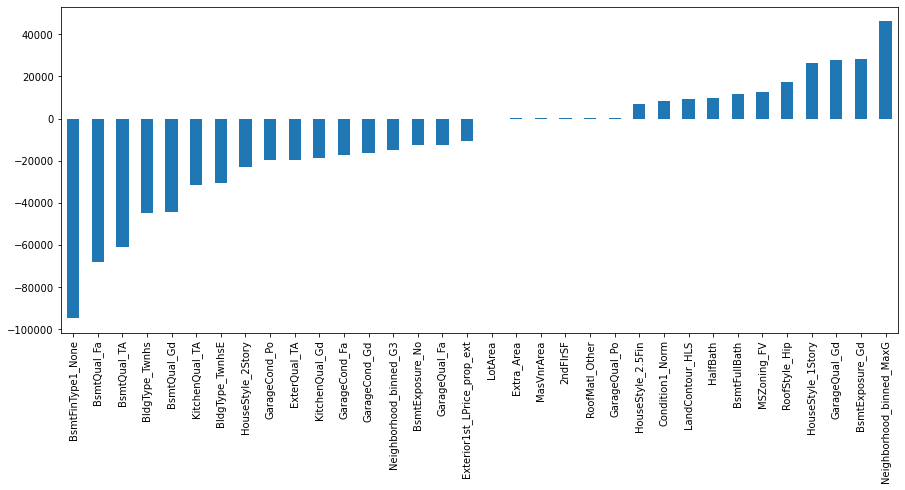

In [114]:
plt.figure(figsize = (15,6))
pd.Series(lasso.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

### Ridge Regression

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

x = train_data1.drop('SalePrice',axis = 1)
y = train_data1.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

param = {'alpha':[0.001,0.005,0.01,0.05,0.1,1,1.5,2,10]}

grid = GridSearchCV(estimator = Ridge(),param_grid = param,cv = 10)
grid.fit(x_train,y_train)

ridge = Ridge(alpha = grid.best_params_['alpha'],max_iter = 1000)
ridge.fit(x_train,y_train)
r_pred_tr = ridge.predict(x_train)
r_pred_te = ridge.predict(x_test)

print("Ridge train log RMSE:" ,rmse(y_train,r_pred_tr))
print("Ridge test log RMSE:" ,rmse(y_test,r_pred_te))
print("Best Alpha parameter:",grid.best_params_['alpha'])


Ridge train log RMSE: 0.2127995462726281
Ridge test log RMSE: 0.23701639097021499
Best Alpha parameter: 2


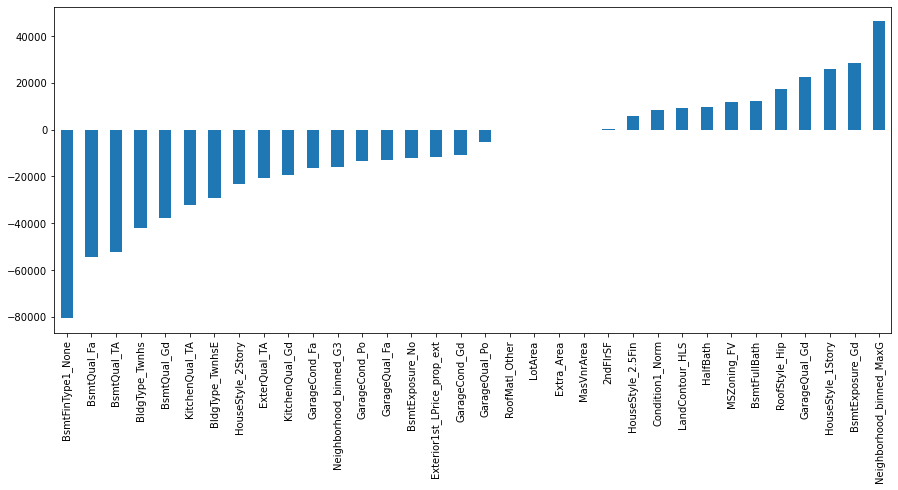

In [116]:
plt.figure(figsize = (15,6))
pd.Series(ridge.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

As expected! Ridge has done a better job for regularization in our case. I believe a combination of ridge and Lasso which is implemented through ElasticNet could do even more better. Let us check it out!

### Elastic Net RMSE: 0.2365. 0.22709(Without Outliers) A significant improvement over the Regression Model

In [117]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

x = train_data1.drop('SalePrice',axis = 1)
y = train_data1.SalePrice

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

param = param = {
         'alpha':[0.01,0.05,0.1],
         'l1_ratio':[0.05,0.1,1] 
        }


grid = GridSearchCV(estimator = ElasticNet(),param_grid = param,cv = 10,verbose = 0)
grid.fit(x_train,y_train)

enet = ElasticNet(alpha = grid.best_params_['alpha'],l1_ratio = grid.best_params_['l1_ratio'],max_iter = 1000)
enet.fit(x_train,y_train)
e_pred_tr = ridge.predict(x_train)
e_pred_te = ridge.predict(x_test)

print("ElasticNet train log RMSE:" ,rmse(y_train,e_pred_tr))
print("ElasticNet test log RMSE:" ,rmse(y_test,e_pred_te))
print("Best Alpha parameter:",grid.best_params_['alpha'])
print("Best L1 ratio parameter:",grid.best_params_['l1_ratio'])



ElasticNet train log RMSE: 0.2127995462726281
ElasticNet test log RMSE: 0.23701639097021499
Best Alpha parameter: 0.1
Best L1 ratio parameter: 1


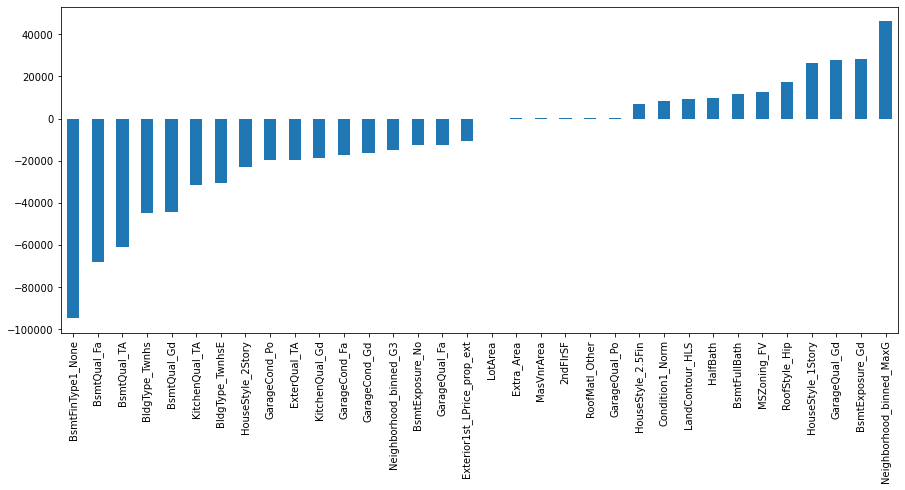

In [118]:
plt.figure(figsize = (15,6))
pd.Series(enet.coef_,x_train.columns).sort_values().plot(kind = 'bar')
plt.show()

###### ElasticNet is able to further balance out the model. This clearly shows that ElasticNet is performing the best. However the overall model itself with the vif filtered parameters is not that great.

In [119]:
solution_generator(enet.predict(test_data1)).to_csv("Submissions/EnetRegression_complete_splittrain.csv",index = False)

# Now we should try AI based models to get better accuracy

------------------------------------------------------------------------------------------

## SGD Regressor

------------------------------------------------------------------------------------------------------------

###### Feature selection using Backward elimination technique

In [430]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sgd = SGDRegressor()


x = train_data.drop('SalePrice',axis = 1)
y = train_data.SalePrice


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

#Backward elimination technique
from sklearn.feature_selection import RFE
rfe = RFE(estimator = SGDRegressor(),n_features_to_select = 110)
rfe.fit(x_train,y_train)
new_f = x_train.columns[rfe.get_support()]

###### Model fitting

In [436]:
new_x = train_data[new_f]
new_x_scaled = ss.fit_transform(new_x)
x_train,x_test,y_train,y_test = train_test_split(new_x_scaled ,y,test_size = 0.2,random_state = 6)
sgd.fit(x_train,y_train)
tr_sgd_pred = sgd.predict(x_train)
te_sgd_pred = sgd.predict(x_test)

print("Train RMSE:",rmse(y_train,tr_sgd_pred))
print("Test RMSE:",rmse(y_test,te_sgd_pred))
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = SGDRegressor(),X = x_train,y = y_train,cv =5)
print("Mean cross val score:",np.mean(scores))
print("Max Cross val score:",max(scores))
print("Min Cross val score:",min(scores))





Train RMSE: 0.1533090124134071
Test RMSE: 0.16185147763772584
Mean cross val score: 0.7842542469354068
Max Cross val score: 0.8895930431667548
Min Cross val score: 0.5056100107709314


In [348]:
#SGD tends to always require standardization as far as I have used this algorithm.
#Model is overfitting since test error is greater than train error.

In [224]:
# #Trying using forward selection
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# x = train_data.drop('SalePrice',axis = 1)
# y = train_data.SalePrice


# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 6)

# s = sfs(SGDRegressor(),k_features = "best",cv = 5)
# s.fit(x_train,y_train)
# sfs_new = s.k_feature_names_


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

### Final Predictions for SGD without any parameter tuning logRMSE: 0.17824

In [443]:
pred_f = sgd.predict(ss.fit_transform(test_data[new_f]))
solution_generator(pred_f).to_csv('Submissions/SGD100feat.csv',index=False)
#We are having a strong effect of negative predictors in this model. We must look for best features using SFS or RFE

In [444]:
#Our linear regression model built in the begining still stands as the best model we have created as yet.